In [ ]:
# Finding Vanishing Points
> How can we model the growth in Afterpay's customer base?

- toc: true 
- badges: true
- comments: true
- categories: [Bayesian,Finance]
    
- image: images/2020-04-10-Finding-Vanishing-Points/header.jpg

In [1]:
%matplotlib inline
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

from io import StringIO
import pandas as pd

import math

plt.rcParams["figure.figsize"] = (10,10)
from warnings import filterwarnings
filterwarnings('ignore')


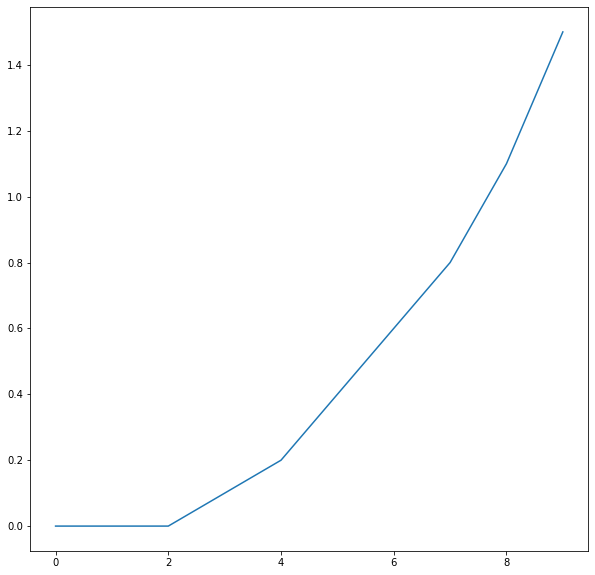

In [2]:
#US in mid-May 2018 
csv_data = StringIO('''millions_customers,date,month_count
            0.0,30-sep-2015,0 
            0.0,31-dec-2015,3 
            0.0,31-mar-2016,6 
            0.1,30-jun-2016,9 
            0.2,30-sep-2016,12
            0.4,31-dec-2016,15
            0.6,31-mar-2017,18
            0.8,30-jun-2017,21
            1.1,30-sep-2017,24
            1.5,31-dec-2017,27''')


df = pd.read_csv(csv_data, sep=",")
plt.plot(df.millions_customers)
plt.show()


In [3]:
with pm.Model() as model:
    millions_customers = df.millions_customers.values
    x = df.month_count.values.astype(np.float64)
    L =  pm.Uniform('L', lower = 0, upper = 25) 
    k =  pm.Uniform('k', lower=0, upper=1) 
    x0 = pm.Uniform('x0', lower=0, upper=100) 
    
    customers_predicted = L/(1+math.e**(-k*(x-x0)))
    
    
    customers = pm.Normal('customers', mu = customers_predicted, sigma = 0.1, observed = millions_customers)
    

In [4]:
with model:
    trace = pm.sample(draws=10_000,tune=5_000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x0, k, L]
Sampling 2 chains, 0 divergences: 100%|██████████| 30000/30000 [01:33<00:00, 320.68draws/s]
The number of effective samples is smaller than 10% for some parameters.


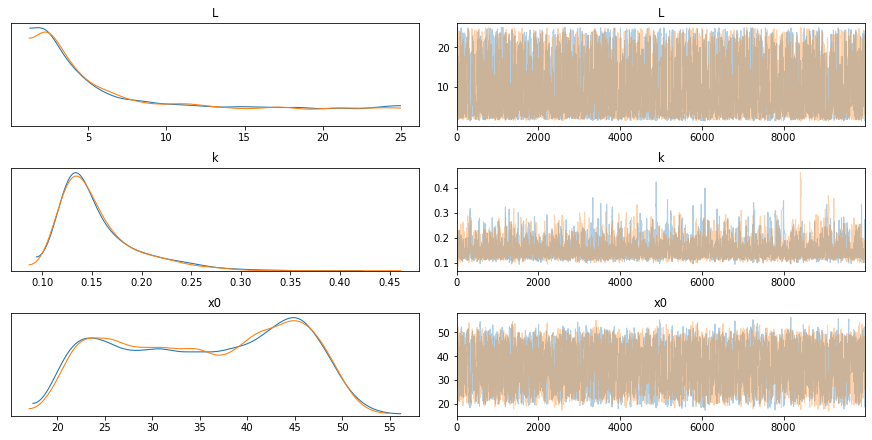

In [5]:
pm.traceplot(trace);

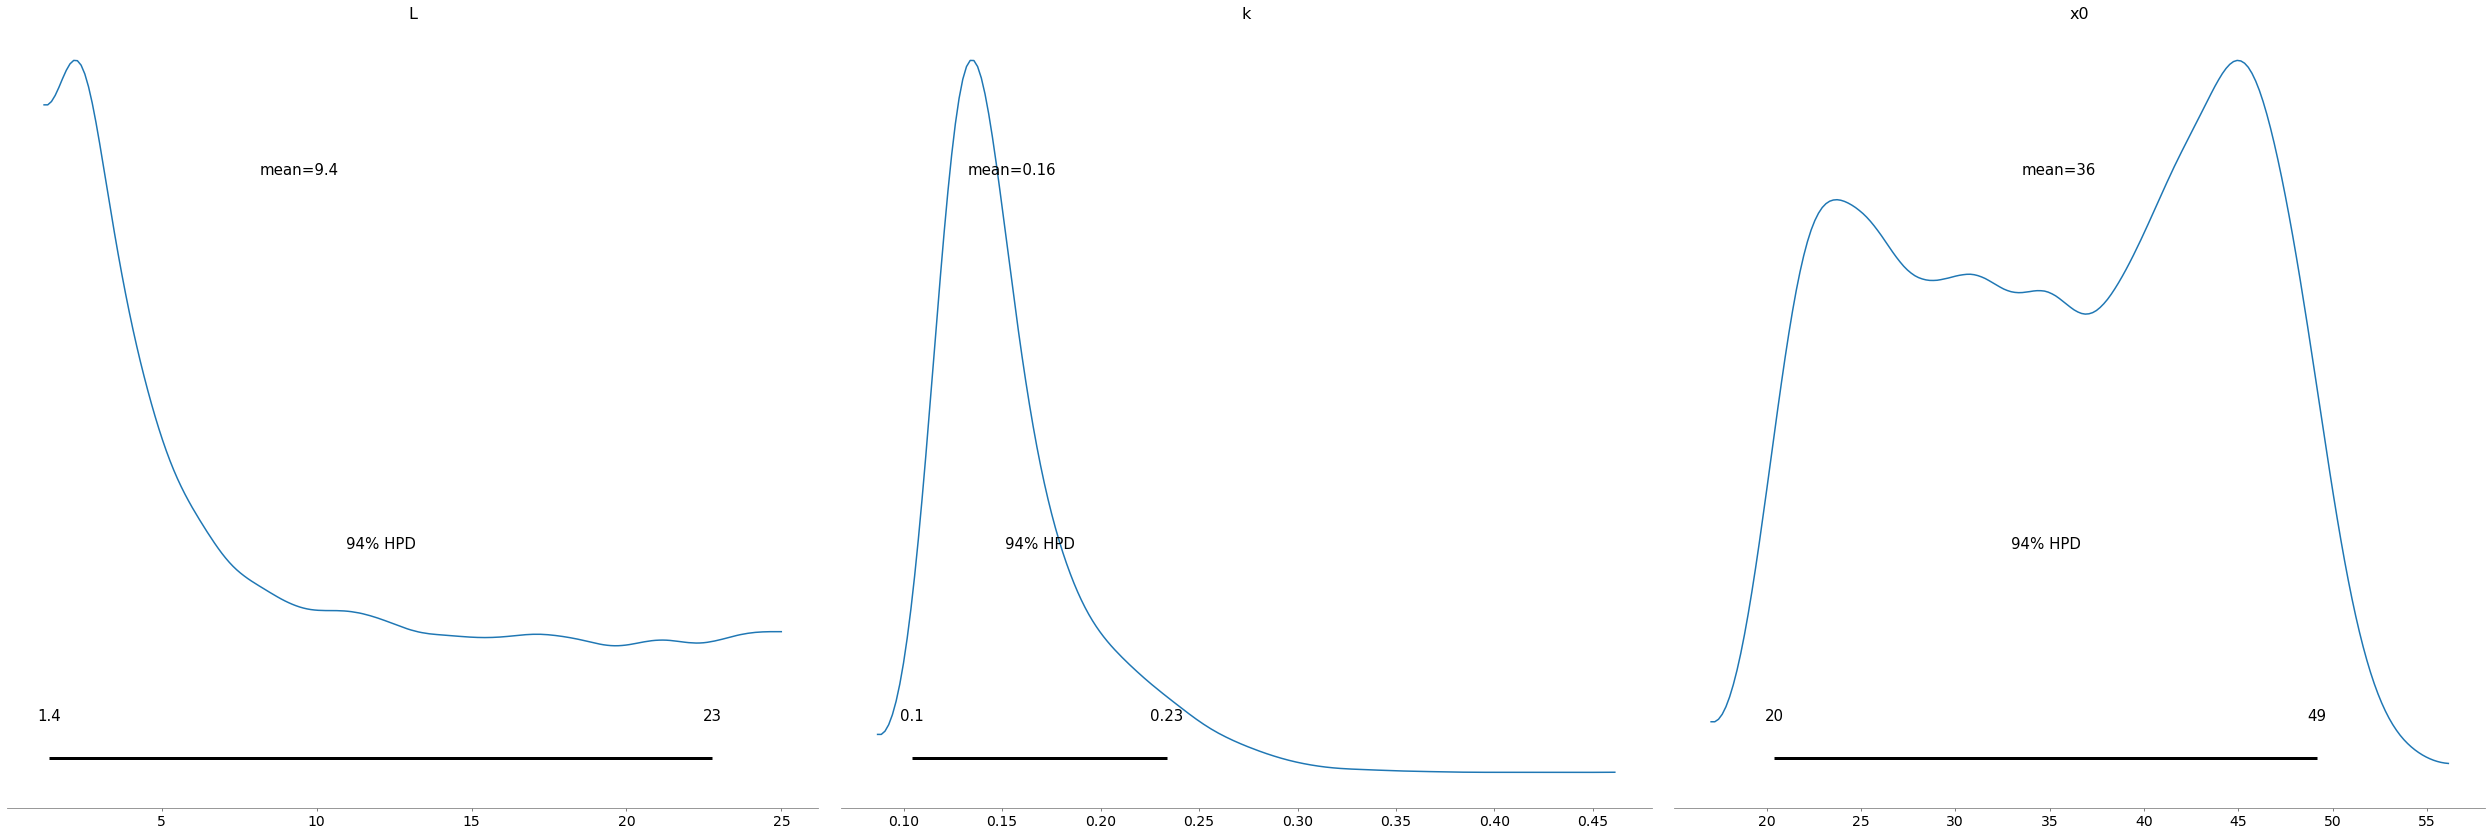

In [6]:
pm.plot_posterior(trace);



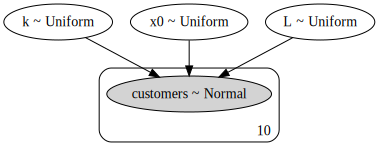

In [7]:
pm.model_to_graphviz(model)

In [8]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
L,9.439,7.153,1.370,22.768,0.152,0.108,2212.0,2212.0,1967.0,3260.0,1.0
k,0.155,0.039,0.104,0.234,0.001,0.001,2066.0,2045.0,2401.0,2763.0,1.0
x0,35.500,9.066,20.409,49.183,0.200,0.142,2046.0,2046.0,2048.0,3280.0,1.0


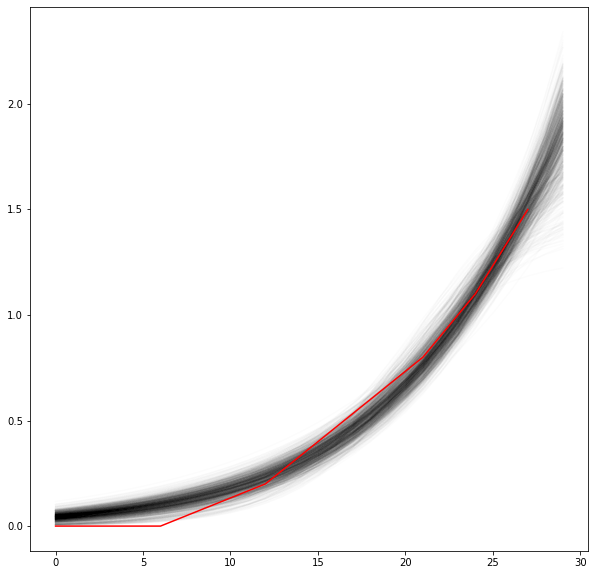

In [9]:

for i in range(0,1_000):
    x = np.arange(0,30)
    plt.plot(x,trace['L'][i]/(1+math.e**(-trace['k'][i]*(x-trace['x0'][i]))),color='k',alpha=0.01)
plt.plot(df.month_count,df.millions_customers,color='r')
plt.show()
 

    


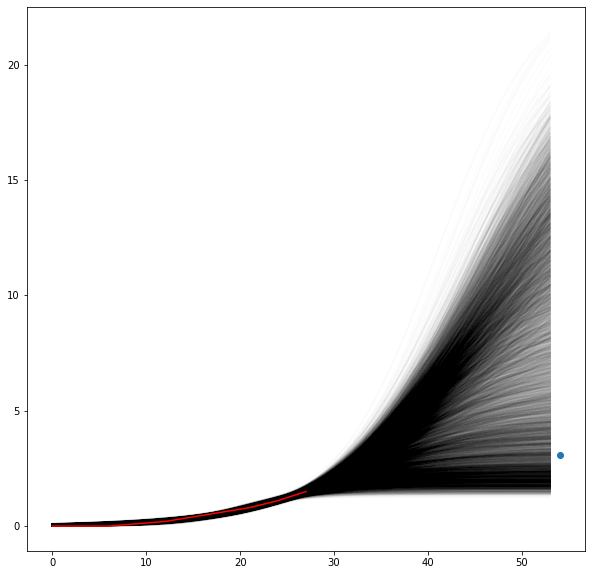

In [10]:
for i in range(0,10_000):
    x = np.arange(0,54)
    plt.plot(x,trace['L'][i]/(1+math.e**(-trace['k'][i]*(x-trace['x0'][i]))),color='k',alpha=0.01)
plt.plot(df.month_count,df.millions_customers,color='r')

plt.scatter(54,3.1)
plt.show()
 

    
